In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense


colnames = ['col1','col2']
label = ['label']
Xtest = pd.read_csv('D:/Desktop/intro to ml 3/test.csv',sep='\t',names = colnames)
ytest = pd.read_csv('D:/Desktop/intro to ml 3/testlabel.csv',sep='\t',names = label)
Xtrain = pd.read_csv('D:/Desktop/intro to ml 3/train.csv',sep='\t',names= colnames)
ytrain = pd.read_csv('D:/Desktop/intro to ml 3/trainlabel.csv',sep='\t',names = label)
Xtrain_500 = pd.read_csv('D:/Desktop/intro to ml 3/train_500.csv',sep='\t',names = colnames)
ytrain_500 = pd.read_csv('D:/Desktop/intro to ml 3/label_500.csv',sep='\t',names = label)
Xtrain_1000 = pd.read_csv('D:/Desktop/intro to ml 3/train_1000.csv',sep='\t',names = colnames)
ytrain_1000 = pd.read_csv('D:/Desktop/intro to ml 3/label_1000.csv',sep='\t',names = label)


Using TensorFlow backend.


In [2]:
X_train = np.array(Xtrain)  #100 train samples
y_train = np.array(ytrain)

X_train_500 = np.array(Xtrain_500) #500 train samples
y_train_500 = np.array(ytrain_500)

X_train_1000 = np.array(Xtrain_1000) #1000 train samples
y_train_1000 = np.array(ytrain_1000)

X_test = np.array(Xtest) #10000 test samples
y_test = np.array(ytest)

y_test = np.reshape(y_test,(10000,))
y_train = np.reshape(y_train,(100,))
y_train_500 = np.reshape(y_train_500,(500,))
y_train_1000 = np.reshape(y_train_1000,(1000,))

y_train_enc = pd.get_dummies(y_train).values #100label train
y_test_enc = pd.get_dummies(y_test).values  #10000 test label
y_train500_enc = pd.get_dummies(y_train_500).values #500 label train
y_train1000_enc = pd.get_dummies(y_train_1000).values #1000 label train



In [3]:
def custom_cross_val(X_train,y_train_enc,N,k):
    for fold in range(k):
        val_data = X_train[fold*(N//k):(fold+1)*(N//k),:]
        train_data = np.concatenate((X_train[:fold*(N//k),:],X_train[(fold+1)*(N//k):,:]),axis = 0)

        val_label = y_train_enc[fold*(N//k):(fold+1)*(N//k),:]
        train_label = np.concatenate((y_train_enc[:fold*(N//k),:],y_train_enc[(fold+1)*(N//k):,:]),axis = 0)
        
        
    return val_data,train_data,val_label,train_label

In [4]:
def MLP(x_tr,y_tr,activation,output,epochs):
    model = Sequential()
    model.add(Dense(output,input_shape=(2,),activation = activation))
    model.add(Dense(3,activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy','categorical_accuracy'])
    history = model.fit(x_tr,y_tr,epochs = epochs,batch_size=10,verbose = 0)
    
    return history,model

In [11]:

def main_model(neurons,X_train,y_train,epochs,N,k):
    score_elu = []
    score_sig = []
    score = []
    active = ['sigmoid','elu']
    for k in range(0,len(active)):
        print('ACTIVATION',active[k])
        for i in neurons:
            print('%%%%%NEURON = {}%%%%%%'.format(i))
            for j in range(10):
                x_te,x_tr,y_te,y_tr = custom_cross_val(X_train,y_train,N,10)
                
                hist_mlp,model = MLP(x_tr,y_tr,active[k],i,epochs)
               
                train_scores = model.evaluate(x_tr,y_tr,verbose = 0)
                test_scores = model.evaluate(x_te,y_te,verbose = 0)
                score.append(test_scores[1]*100)

    sig_score = score[:len(score)//2]
    elu_score = score[len(score)//2:]
    for z in range(0,len(neurons)):
        w = z*10
        comp_nll1 = np.average(sig_score[w:w+10])
        score_sig.append(comp_nll1)
        comp_nll2 = np.average(elu_score[w:w+10])
        score_elu.append(comp_nll2)
#     ypred = model.predict(x_te)
#     ypred_class = model.predict_classes(x_te)

    plt.subplot(211)
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['figure.figsize'] = [7,7]
    plt.xlabel('Neurons')
    plt.ylabel('accuracy')
    plt.bar(neurons,score_elu,color = 'red')
    plt.subplot(212)
    plt.bar(neurons,score_sig,color = 'blue')
    
    print(np.argmax(score_elu)+1)
    return hist_mlp,model

ACTIVATION sigmoid
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
ACTIVATION elu
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
9


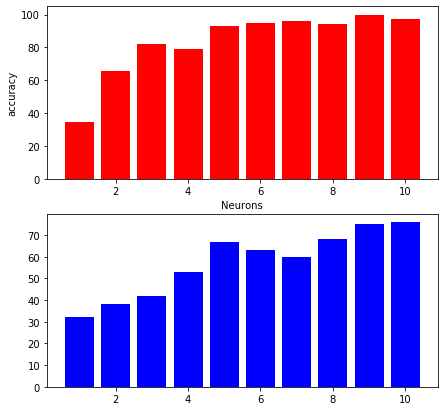

In [12]:
neurons = [1,2,3,4,5,6,7,8,9,10]
hist_100,model = main_model(neurons,X_train,y_train_enc,epochs=150,N=100,k=10)

In [59]:
np.average(hist_100.history['accuracy'])

0.7296001

In [16]:
#saving the model
model.save('model100.h5')
print('Model Saved')

Model Saved


Now repeating the procedure for 500 training samples

ACTIVATION sigmoid
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
ACTIVATION elu
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
10


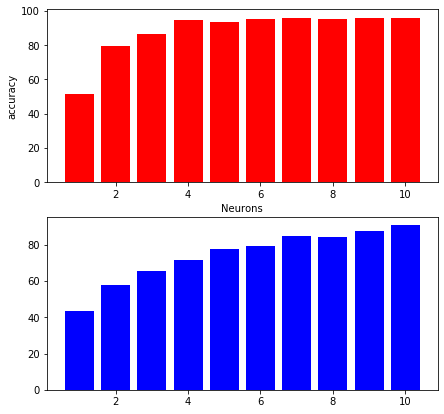

In [18]:
neurons500 = [1,2,3,4,5,6,7,8,9,10]

hist_500,model500 = main_model(neurons,X_train_500,y_train500_enc,150,500,10)

In [29]:
model.save('model500.h5')
print('model 500 saved')

model 500 saved


Now repeating the steps for 1000 training samples

ACTIVATION sigmoid
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
ACTIVATION elu
%%%%%NEURON = 1%%%%%%
%%%%%NEURON = 2%%%%%%
%%%%%NEURON = 3%%%%%%
%%%%%NEURON = 4%%%%%%
%%%%%NEURON = 5%%%%%%
%%%%%NEURON = 6%%%%%%
%%%%%NEURON = 7%%%%%%
%%%%%NEURON = 8%%%%%%
%%%%%NEURON = 9%%%%%%
%%%%%NEURON = 10%%%%%%
9


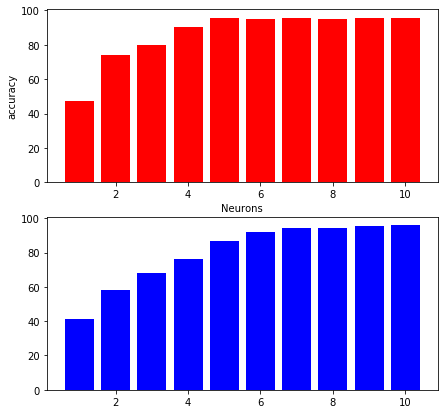

In [25]:

histfinal_1000,model1000 = main_model(neurons,X_train_1000,y_train1000_enc,150,N=1000,k=10)

In [26]:
model.save('model1000.h5')
print('model 1000 saved')

model 1000 saved


Final Training Model on 100 training samples and testing on 10000 test samples

In [19]:
histfinal_100,model100 = MLP(X_train,y_train_enc,'elu',9,100)
trainaccuracy100 = model100.evaluate(X_train,y_train_enc)
testaccuracy100 = model100.evaluate(X_test,y_test_enc)
print(trainaccuracy100[1])
print(testaccuracy100[1])


10000/10000 [==============================] - 1s 52us/step
0.949999988079071
0.8830999732017517


Final Training Model on 500 training samples and testing on 10000 test samples

In [65]:
histfinal_500,model500 = MLP(X_train_500,y_train500_enc,'elu',6,100)
trainaccuracy500 = model500.evaluate(X_train_500,y_train500_enc)
testaccuracy500 = model500.evaluate(X_test,y_test_enc)
print(trainaccuracy500[1])
print(testaccuracy500[1])


10000/10000 [==============================] - 0s 14us/step
0.9559999704360962
0.9700999855995178


Final training model on 1000 training samples and testing on 10000 test samples

In [70]:
histfinal_1000,model1000 = MLP(X_train_1000,y_train1000_enc,'elu',5,100)
trainaccuracy1000 = model1000.evaluate(X_train_1000,y_train1000_enc)
testaccuracy1000 = model1000.evaluate(X_test,y_test_enc)
print(trainaccuracy1000[1])
print(testaccuracy1000[1])


10000/10000 [==============================] - 0s 15us/step
0.9679999947547913
0.9717000126838684


DOING MAP CLASSIFICATION BASED ON 100 SAMPLES TRAINING MODEL

In [44]:
from keras.models import load_model
model100 = load_model('model100.h5')
y_pred100 = []
ypred100 = model100.predict_classes(X_test)
for i in ypred100:
    i = i+1
    y_pred100.append(i)
y_pred100 = np.array(y_pred100)
print(y_pred100)
print(y_test)

[2 2 3 ... 3 1 3]
[2 2 3 ... 3 1 3]


DOING MAP CLASSIFICATION BASED ON 500 SAMPLES TRAINING MODEL

In [45]:
from keras.models import load_model
model500 = load_model('model500.h5')
y_pred500 = []
ypred500 = model500.predict_classes(X_test)
for i in ypred500:
    i = i+1
    y_pred500.append(i)
y_pred500 = np.array(y_pred500)
print(y_pred500)
print(y_test)

[2 2 3 ... 3 1 3]
[2 2 3 ... 3 1 3]


DOING MAP CLASSIFICATION BASED ON 1000 SAMPLES TRAINING MODEL

In [46]:
from keras.models import load_model
model1000 = load_model('model1000.h5')
y_pred1000 = []
ypred1000 = model1000.predict_classes(X_test)
for i in ypred1000:
    i = i+1
    y_pred1000.append(i)
y_pred1000 = np.array(y_pred1000)
print(y_pred1000)
print(y_test)

[2 2 3 ... 3 1 3]
[2 2 3 ... 3 1 3]


In [71]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred1000)
acc

0.9535